<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-2-Challenge" data-toc-modified-id="Week-2-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 2 Challenge</a></span></li><li><span><a href="#Controller-Design:-An-Introduction-to-Timers-and-Rising-Edge-Counters" data-toc-modified-id="Controller-Design:-An-Introduction-to-Timers-and-Rising-Edge-Counters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Controller Design: An Introduction to Timers and Rising Edge Counters</a></span><ul class="toc-item"><li><span><a href="#Timers" data-toc-modified-id="Timers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Timers</a></span></li><li><span><a href="#Rising-Edge-Counters" data-toc-modified-id="Rising-Edge-Counters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rising Edge Counters</a></span></li></ul></li><li><span><a href="#Controller-Validation:-Timers-and-Rising-Edge-Counters-in-the-Boolean-Simulator" data-toc-modified-id="Controller-Validation:-Timers-and-Rising-Edge-Counters-in-the-Boolean-Simulator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Controller Validation: Timers and Rising Edge Counters in the Boolean Simulator</a></span><ul class="toc-item"><li><span><a href="#Timer-Example" data-toc-modified-id="Timer-Example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Timer Example</a></span></li><li><span><a href="#Counter-Example" data-toc-modified-id="Counter-Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Counter Example</a></span></li></ul></li><li><span><a href="#Controller-Validation:-Timers-and-Rising-Edge-Counters-in-Arduino" data-toc-modified-id="Controller-Validation:-Timers-and-Rising-Edge-Counters-in-Arduino-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Controller Validation: Timers and Rising Edge Counters in Arduino</a></span></li><li><span><a href="#Exercise:--Due-by-midnight-on-Friday,-9/10/2021" data-toc-modified-id="Exercise:--Due-by-midnight-on-Friday,-9/10/2021-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise:  Due by midnight on Friday, 9/10/2021</a></span><ul class="toc-item"><li><span><a href="#Challenge:-Design-a-vending-machine" data-toc-modified-id="Challenge:-Design-a-vending-machine-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Challenge: Design a vending machine</a></span><ul class="toc-item"><li><span><a href="#Controller-Design-and-Validation:-Timers-and-Rising-Edge-Counters" data-toc-modified-id="Controller-Design-and-Validation:-Timers-and-Rising-Edge-Counters-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Controller Design and Validation: Timers and Rising Edge Counters</a></span></li><li><span><a href="#Controller-Design---State-Transition-Table" data-toc-modified-id="Controller-Design---State-Transition-Table-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Controller Design-- State Transition Table</a></span></li><li><span><a href="#Controller-Design---State-Transition-Table" data-toc-modified-id="Controller-Design---State-Transition-Table-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Controller Design-- State Transition Table</a></span></li><li><span><a href="#Controller-Validation:-Arduino-Code" data-toc-modified-id="Controller-Validation:-Arduino-Code-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Controller Validation: Arduino Code</a></span></li></ul></li></ul></li></ul></div>

**Important: The cell below this one must be run before the assignments will function.**

In [1]:
from metakernel import register_ipython_magics
register_ipython_magics()

# Week 2 Challenge

In lab this week, you will be asked to design a controller for your workstation's gate system that will raise the gate for a specificed amount of time, will lower the gate once the time is reached, and then use a sensor to determine if it should close all the way or re-open because the robot has not moved through the gate.
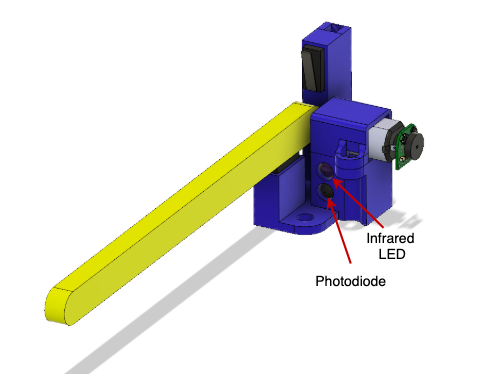

If after 3 attempts, the object has not moved out of the way of the gate, it stops trying and enters a fault mode.

Consider how a state machine operating a system like this one might "know" to hold the gate open for certain amount of time. As an operator, would you like to know what its doing so you know the controller is working properly even though nothing is happening? How will it keep track of the fact it has tried 3 times before it gives up?

Today's notebook is an introduction to the tools commonly used in finite state machine design to facilitate this type of behavior. 





# Controller Design: An Introduction to Timers and Rising Edge Counters



## Timers

In many applications where a FSM is a good choice for high-level program operation, you'll find yourself needing to design your state machines' transitions too use a few common stimuli. For instance: if you need to create a system that "waits" for a specified period of time after a button is pressed, or requires that a button is pressed for a particular length of time to "make sure" that the user meant to enter a particular machine state, you'll likely need to implement (or use) some kind of **timer** so that the stimulus of "wait for a specified amount of time" can be implemented in your state transition diagram and chart. 

Timers are extremely common in finite state machine design. They behave in the following way:

* When the boolean input to the timer is TRUE, the timer counts up (usually in milliseconds).
* When the elapsed time is greater than some threshold, the timer's output variable is set to TRUE. Otherwise it is FALSE.
* When the input to the timer is FALSE, the timer stops counting and the elapsed time is *reset* to zero.

## Rising Edge Counters

A rising edge counter helps a finite state machine keep track of how many times something has happened. This, like a timer, is a common need for designing the stimuli for transitions in FSMs. A standard counter that you might find on an industrial controller has three inputs: an "up input," a "down input," and a "reset input." 

* If the user (or the state transition logic) sets the "up" input true with a *unique rising edge* (was false, now true-- like a button press), an internal variable (integer) in the counter will count up by one. 
* If the using input sets the "down" input to be true with a "unique rising edge",it will bring the count (the counter's "accumulator") down by one. Generally, counters have a minimum value of 0.
* Whenever the "reset" input on the counter is true, the count is resets to zero. 
* When the counter's accumulator reaches a preset value the output variable is set to TRUE.  Otherwise it is FALSE.

# Controller Validation: Timers and Rising Edge Counters in the Boolean Simulator

To see how timers and rising edge counters work, let's validate our understanding of how they function using a simple simulator. Using the ME480 Boolean logic simulator can help you quickly test finite state machine designs you may later use on your Zumo or your ME480 workstation, without involving any hardware.

The Boolean Logic simulator you first saw in [Week 01 C](../W01C_FSM_FourBlock/W1C_FSM_FourBlock.ipynb) (reproduced below) has built-in timers and rising edge counters as described above.  The variables you can access to operate these are explained below.  


| Timer 0 variables      |                                        |
|:-----:|:--------------------------------------:|
|T0_DUR | Timer preset duration                  |
|T0_EN  | Enables the timer when TRUE            |
|T0     | TRUE when elapsed time reaches duration|
|TA0    | Elapsed time in milliseconds           |




|  Counter 0 variables          |                                        |
|:----------:|:--------------------------------------:|
|CT0_CNT     | Counter preset value             |
|CT0_UP      | On transition from FALSE to TRUE, count increases by 1            |
|CT0_DOWN    | On transition from FALSE to TRUE, count decreases by 1            |   
|CT0_RST     | Counter resets when TRUE  |
|CT0         | TRUE when count reaches preset value |
|CTA0        | Current count |

Cut/Paste the following examples to confirm your understanding of how timers and rising edge counters should work in the simulator.

## Timer Example

The code below will enable the the T0 timer when X1 is pressed.  The Y2 light will turn on when the timer reaches the specified time duration. The Y3 light will turn on when the elapsed time has passed 3000 milliseconds.  When the button is released, the timer will reset.

``` javascript
T0_DUR = 1000  //Timer 0 duration in milliseconds

//Block 1
T0_EN = X1

//Block 2

//Block 3

//Block 4
Y1 = T0        //Y1 light true if timer reaches duration
Y2 = TA0>=3000   //Y2 light true if elapsed time reaches 3000
```

## Counter Example

Pressing X1 will cause the counter to increase.  Pressing X2 will cause the counter to decrease.  Pressing X3 will reset the counter. The Y1 will light will turn on when the counter reaches the preset value.  The Y2 light will turn on when the count reaches at least 5.

``` javascript
CT0_CNT = 3 // Counter 0 preset value

//Block 1

//NOTE that HOLDING X1, X2, or X3 DOES NOT continue to increase the count
//The counter only increases/decreases on a transition from FALSE to TRUE
CT0_UP   = X1     
CT0_DOWN = X2
CT0_RST  = X3

//Block 2

//Block 3

//Block 4
Y1 = CT0       //Y1 light true if counter reaches preset
Y2 = CTA0>=5   //Y2 light true if count is at least 5
```

In [2]:

%%html
<iframe src="https://workbench.lafayette.edu/~brownaa/ME480/plainsim/plainsim.html" width="1200" height="1000"></iframe>



Explore the operation of timers and rising edge counters using the examples above. Paste them into the simulator, modify them, and get a feel for how you might use timers and rising edge counters in state machine designs. Think about how you might use them to tackle the challenge at the top of this notebok (the Lab 2 gate problem). 


While the Boolean Algebra simulator is a powerful tool for you to prototype state machine designs, especially now that you have seen how its built-in timers and counters are used, it is important to be able to use timers and counters on real hardware, like your Zumo robot or Lab workstation. To learn how, let's look at how we might implement timers and rising edge counters in the Arduino language.


# Controller Validation: Timers and Rising Edge Counters in Arduino

Industrial controllers like Programmable Logic Controllers (PLCs) and our ME480 boolean logic simulator have built-in timers and rising edge counters, but by default, Arduino based controllers (used in Lab and on the Zumo) require that you create them yourself. 

However, the ME480 instructors have created an Arduino Library ([what is that?](https://www.arduino.cc/reference/en/libraries/)) for you that implements the functionality of built-in counters and timers that you can use in your finite state machines. **IMPORTANT!! To learn more about Arduino Libraries, including how to learn to use a library that is new to you, see the [hardware resource](../W01E_Implementation_Resources/W01E_Arduino_Resource.ipynb#Arduino-Libraries) Section on Arduino Libraries (Section 2). You will need to read and understand this section in order to complete this week's assignment**.

To validate our understanding of how timers and rising edge counters can be implemented on Arduino, you can use your Zumo robot or your ME480 workstation. To set up your personal computer so that you can program your Zumo, please see [this page](https://www.pololu.com/docs/0J63/5.2). If you don't have your robot yet, you can use the ME480 lab workstation instead. Just be sure to choose the correct "board" type in the Arduino environment, and modify pin numbers in the code as needed.

# Exercise:  Due by midnight on Friday, 9/10/2021

## Challenge: Design a vending machine

To get some practice using counters and timers, consider a simplified version of a snack machine, like the one shown below.

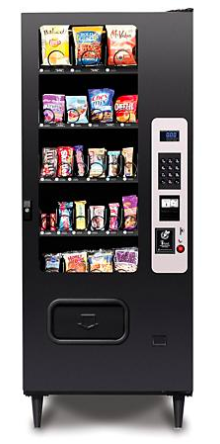

If you're really hungry, you can buy this machine from Sam's club [here](https://www.samsclub.com/p/sv3000-selectivend/prod21422777?&source=ifpla&itemNumber=980061909&CAWELAID=730010300001879524&pid=ps_CSE_Google_PLA_6451806614&wl0=&wl1=g&wl2=c&wl3=378128317615&wl4=pla-402483558450&wl5=9006934&wl6=&wl7=&wl9=pla&wl10=1247713&wl11=online&wl12={productid}&wl13=&wl15=74560770182&wl17=1o1&veh=sem&kclid=27d3df91-b6b6-4a27-b4e8-fa28fcfc21cf&gclid=EAIaIQobChMIwd_YtYCu5AIVFY_ICh0YSwVNEAQYASABEgLPE_D_BwE) but you will also have to buy snacks to put in it. (image credit: Sam's Club)

These types of machines use a motor driven wire screw to push product off the rack as illustrated in the video below for a similar machine. You can find a machine just like this on the 5th floor on the way to office hours!

In [ ]:
%%html
<iframe width="600" height="400" src="https://www.youtube.com/embed/rMz18_M1cyY?start=0&end=12" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Imagine a version of this machine that only dispenses one product... for free. Whenever a user presses the momentary button 1 on your workstation (or button A on your Zumo, if your Zumo is acting like a vending machine), the machine turns on a screw motor (simulated on the LCD display) for that product for 1 second to dispense it. Then, it returns to a "ready" condition and waits for another input on the button.

However, the machine knows that the screw only holds 5 snacks. Therefore, after the machine has dispensed 5 snacks, it will no longer turn on motor when the button is pressed. After it is empty, a technician must refill the machine and reset it by pressing a reset button in order to allow it to dispense more product.

**In other words, the vending machine has the following requirements:**

* The machine will default to a "ready" condition and will stay there unless the button is pressed. The machine will display "ready" on its LCD.
* Upon a unique press of the machine's button, the machine will vend product by activating the motor for 1 second, as long as less than 5 snacks have been dispensed. The machine will display "vending" on its LCD. When the machine is done dispensing product, it will return to the ready condition.
* After the 5th snack has been dispensed, the machine will move to a fault condition and display "out" on its LCD after a subsequent button press. It will remain in this condition until a hardware reset (performed by the snack technician).

### Controller Design and Validation: Timers and Rising Edge Counters

**WE WILL NOT USE the workstation's MOTOR or Zumo's MOTOR for these exercises!**

*This is just practice so we'll use your workstation's button 1 and LCD display only, OR your Zumo's button A and LCD display only.* 

You can assess your understanding of how Timers and Rising edge counters in FSMs work by implementing a simple state machine design to meet the requirements of the "vending machine" above. You'll design this state machine, and then implement it on either your Zumo or your workstation to validate its operation. 

### Controller Design-- State Transition Table

Design a state transition diagram for an FSM design of the snack machine.

Paste your diagram here:

YOUR ANSWER HERE

### Controller Design-- State Transition Table 

Design a state transition table to go with your diagram above. 

Place your state transition table here:

YOUR ANSWER HERE

### Controller Validation: Arduino Code 

Some starter code is provided below to help you interface with your Zumo's (or your workstation's) button and LCD display. Notice the use of the `LiquidCrystal` library (for the workstation) and the `Zumo32U4LCD` library (for your Zumo). These libraries help us interface with the LCD screen used by your Zumo or your workstation. The sample code is currently set up for a Zumo, but the comments with each line will explain how to modify the example for use on your workstation, if you prefer.

In order for you to be successful here, you will need to use the [ME480FSM](https://alexanderallenbrown.github.io/ME480FSM/) library documentation to understand how to use the timer and rising edge counter classes in the library. This is a chance to practice learning how to use an unfamiliar Arduino library, which will be very important for your Zumo project! Once again, a description of how to use libraries and their documentation is provided in the [Arduino Resource](../W01E_Implementation_Resources/W01E_Arduino_Resource.ipynb#Arduino-Libraries).

**Note: You may wish to get your state machine design worked out without using Arduino. If you wish to do this, you can use the Boolean simulator above! You'll need to use the simulator's built-in variable names if you do this, but after your design is solid, you will be able to translate it to Arduino with the knowledge that the state machine itself is solid. This may help you debug your Arduino code efficiently.**

``` c++
//#include <LiquidCrystal.h> //include LCD library IF USING WORKSTATION
#include <Zumo32U4LCD.h>// include LCD Library IF USING ZUMO
#include <ME480FSM.h> //include ME480 FSM Timer Counter library


//initialize a timer and a rising edge counter using our ME480FSMTimerCounter library.
FSMTimer timer1(3000);//duration of the timer in milliseconds. YOU MAY NEED TO CHANGE THIS!
RisingEdgeCounter counter1(3);//preset for our counter. YOU MAY NEED TO CHANGE THIS!

//This variable represents the output of the FSM.
//Set to true to turn on the motor on the LDC display
//Set to false to turn off on the display
boolean Motor = false; 

// Pin numbers for LDC display. IF USING WORKSTATION.
//int lcd_rs_pin = 14;// for workstation, use pin 14
//int lcd_en_pin = 15;// for workstation, use pin 15
//int lcd_db4_pin = 16;// for workstation, use pin 16
//int lcd_db5_pin = 17;// for workstation, use pin 17
//int lcd_db6_pin = 18;// for workstation, use pin 18
//int lcd_db7_pin = 19;// for workstation, use pin 19

// Initialize the LCD library for WORKSTATION.
//LiquidCrystal LCD(lcd_rs_pin, lcd_en_pin, lcd_db4_pin, lcd_db5_pin, lcd_db6_pin, lcd_db7_pin);
Zumo32U4LCD LCD;// initialize LCD if using ZUMO. Comment out if using workstation.

//declare the pin number for the button I'll use to activate the timer.
//for Zumo, it is pin 14 for button A. For ME480 workstation, it is pin 29 for BTN 1.
int BTN1_pin = 14;



//finally, DECLARE YOUR BOOLEAN FSM VARIABLES HERE!


//outputs for the state machine tell the LCD screen what to display:
bool YR = false; //this output should go true only when the machine is ready to vend
bool YV = false; //this output should go true only when the machine is vending
bool YO = false; //this output should go true only when the machine is out of snacks. 


//setup function runs once
void setup(){
// set up the LCD's number of columns and row ONLY IF USING WORKSTATION.
// LCD.begin(8, 2);
// set up the user button A (Zumo) or button 1 (workstation) as an input
pinMode(btnA_pin,INPUT_PULLUP);
}

//this function runs over and over forever!
void loop(){

  // BLOCK 1: Process Inputs
  //----------------------------------------
  bool btnA_state = !digitalRead(btnA_pin);//note the NOT here. the button pin's state is normally TRUE.
  //however, we want to know when the button is held and/or pressed! so we use a NOT so that we
  //will have a TRUE on btnA_state when the button is down, and FALSE when it is up.

  // You will need to set timer 1's enable bit appropriately here!
  // You will also need to increment the counter here. Think about doing this based on what state
  // your FSM is in!
    
  // Make sure to call timer1.update() and counter1.update() in block 1, so that you can use 
  // properties of the timer and counter in Block 2 (e.g. whether the timer's output is true).
    
  // BLOCK 2: State Transition Logic
  //---------------------------------------- 
   
  
    
  // BLOCK 3: Update States
  //---------------------------------------- 

  
  
    
  // BLOCK 4: Set Outputs and Old Variables
  //----------------------------------------   

  // Here you will need to update the value of the boolean variable MOTOR based
  // on the states updated above.

    
  //finally, interface with hardware using the values of our state machine's outputs.
  //Output Motor State and time to LCD display
  
  LCD.clear();
  if(YR){
    LCD.print("Ready");
  }
  else if(YV){
    LCD.print("Vending");
  }
  else if(YO){
    LCD.print("Out");
  }

  //delay 100 milliseconds to control the sampling rate and LCD flickering
  delay(100);
}
```

Modify the code above, using good, verbose comments to explain your implementation. Paste your completed code below, using backticks so that the code is properly formatted when the cell is rendered. The backtick key is the tilde key (to the left of the number 1 on your keyboard). The "c++" in the image below ensures that the code is highlighted properly for the c++ language (Arduino is a subset of c++).

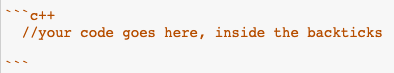

Paste your completed code below, along with a link to a YouTube video that demonstrates the functionality of your state machine running on either your Zumo or your workstation. **Note that completing this exercise means you are extremely well-positioned for Lab 2!! Compare the requirements of Lab 2's gate program to the requirements for the vending machine, and you'll see what I mean!**

Your completed code and YouTube link go here:

YOUR ANSWER HERE